# **Anomaly Detection in Time Series Data**

This will be a **short notebook exploring Anomaly Detection**. I will, initially, use just one algorithm (**Isolation Forest**), but with the view to expand this notebook over time.

The Isolation Forest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

## **Different Approaches to Time Series Anomaly Detection**

Check out this notebook I put together to showcase the **STUMPY** Matrix Profiling library and how it can be used for anomaly detection:

https://www.kaggle.com/code/joshuaswords/anomaly-detection-with-stumpy-matrix-profiling

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Extra Libs
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest

# **The Data**

The dataset I will use here is the New York City Taxi Demand dataset.

The raw data is from the NYC Taxi and Limousine Commission.
The data file included here consists of aggregating the total number of
taxi passengers into 30 minute buckets.


**Some Inspiration & References for this Project**


https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection

https://www.youtube.com/watch?v=XCF-kqCB_vA&ab_channel=AIEngineering

https://www.kaggle.com/koheimuramatsu/industrial-machine-anomaly-detection/comments

https://holoviews.org/

http://holoviews.org/user_guide/Plotting_with_Bokeh.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [ ]:
df = pd.read_csv('./nyc_taxi.csv', parse_dates=['timestamp'])

(df.head(5)
 .style
 .set_caption('New York City Taxi Demand')
 .format({'value':"{:,.0f}"})
)

The dataset has just two columns. 

It will be good to do some **Feauture Engineering** later to extract as much information as we can from these existing features.

**Housekeeping**

Checking for blank values, checking Data Types etc.

In [ ]:
df.info()
# df.set_index('timestamp', inplace=True)


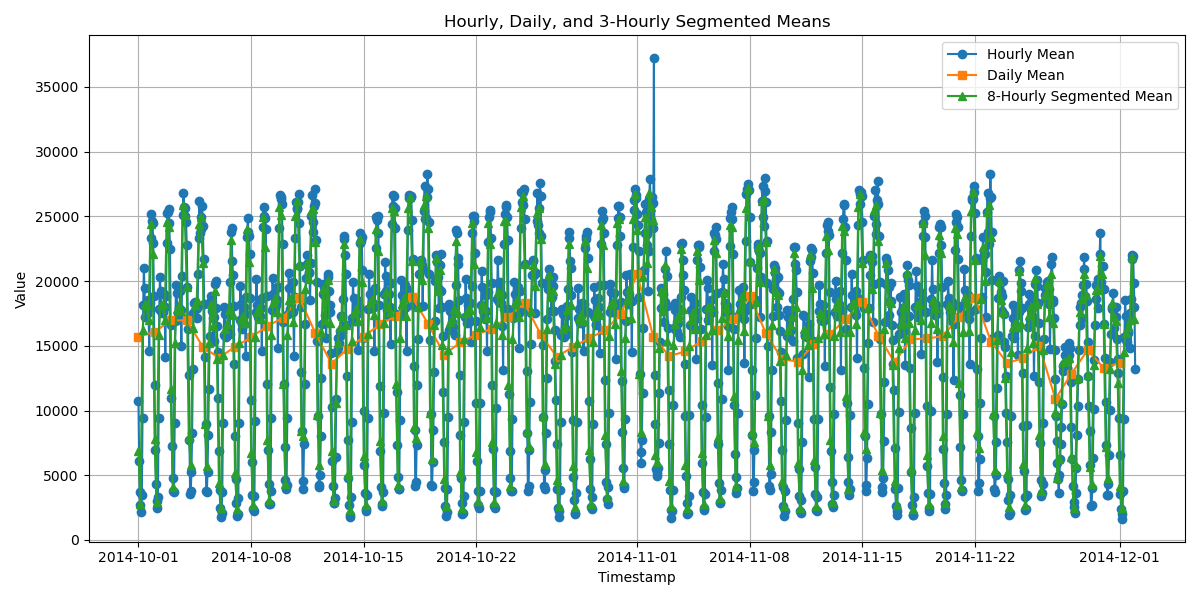

In [78]:
# Convert timestamp to index
# if ('timestamp' not in df.columns()):
if (df.index.name != 'timestamp'):
    df.set_index('timestamp', inplace=True)
type(df)

# Calculate hourly mean
df_hourly = df['value'].resample('H').mean()

    # Calculate daily mean
df_daily = df['value'].resample('D').mean()

# Calculate 3-hourly segmented mean
segment_len = 3
segment_start_points = list(range(0, 24, segment_len))
df['seg_num'] = np.nan

segment_length = 8
df_segment = df['value'].resample(f'{segment_len}H').mean()


start_time = '2014-10-1'
end_time = '2014-12-1'
# start_time = min(df.index)
# end_time = max(df.index)




# Plotting
plt.figure(figsize=(12, 6))

# Plot hourly mean
plt.plot(df_hourly.loc[start_time:end_time].index, df_hourly.loc[start_time:end_time].values, label='Hourly Mean', linestyle='-', marker='o')

# Plot daily mean
plt.plot(df_daily.loc[start_time:end_time].index, df_daily.loc[start_time:end_time].values, label='Daily Mean', linestyle='-', marker='s')

# Plot segmented mean
plt.plot(df_segment.loc[start_time:end_time].index, df_segment.loc[start_time:end_time].values, label=f'{segment_length}-Hourly Segmented Mean', linestyle='-', marker='^')

# Customize plot
plt.title(f'Hourly, Daily, and {segment_len}-Hourly Segmented Means')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
